In [221]:
import pandas as pd
import numpy as nd
import matplotlib.pyplot as plt
import tensorflow as tf

In [222]:
data=pd.read_csv('data.csv',index_col=False)
data.head()

,Unnamed: 0,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [223]:
data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [224]:
data.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.4+ KB


In [226]:
data.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [227]:
data.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,444.271845,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,203.949253,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,260.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,555.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


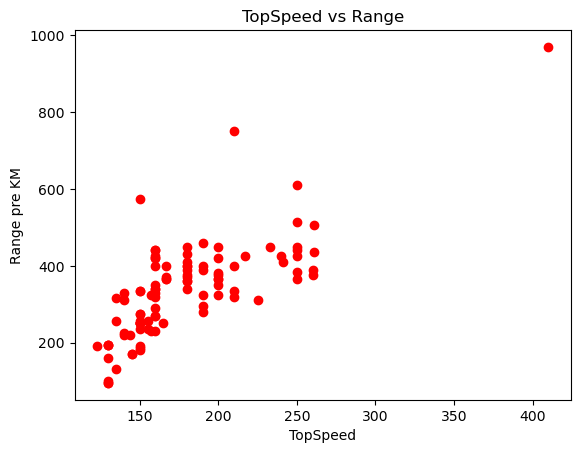

In [228]:
plt.scatter(data['TopSpeed_KmH'],data['Range_Km'],color='red')
plt.title('TopSpeed vs Range')
plt.xlabel('TopSpeed')
plt.ylabel('Range pre KM')
plt.show()

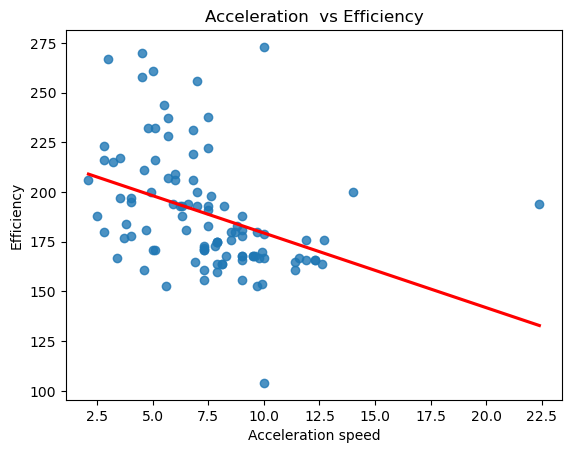

In [229]:
import seaborn as sns
sns.regplot(x=data['AccelSec'], y=data['Efficiency_WhKm'], ci=None, line_kws={"color": "red"})
plt.title('Acceleration  vs Efficiency')
plt.xlabel('Acceleration speed')
plt.ylabel('Efficiency')
plt.show()

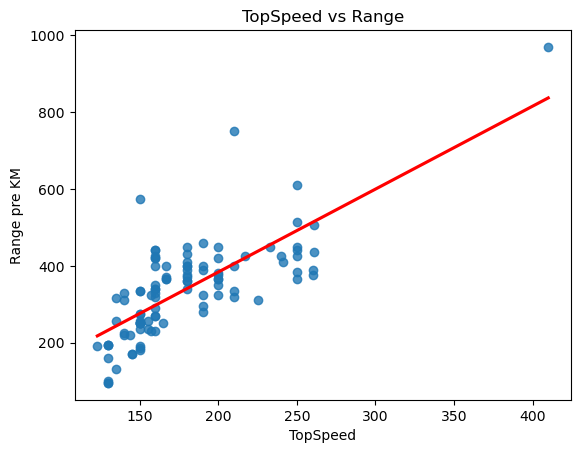

In [230]:
sns.regplot(x=data['TopSpeed_KmH'], y=data['Range_Km'], ci=None, line_kws={"color": "red"})
plt.title('TopSpeed vs Range')
plt.xlabel('TopSpeed')
plt.ylabel('Range pre KM')
plt.show()

In [231]:
data.dtypes

Brand               object
Model               object
AccelSec           float64
TopSpeed_KmH         int64
Range_Km             int64
Efficiency_WhKm      int64
FastCharge_KmH       int64
RapidCharge         object
PowerTrain          object
PlugType            object
BodyStyle           object
Segment             object
Seats                int64
PriceEuro            int64
dtype: object

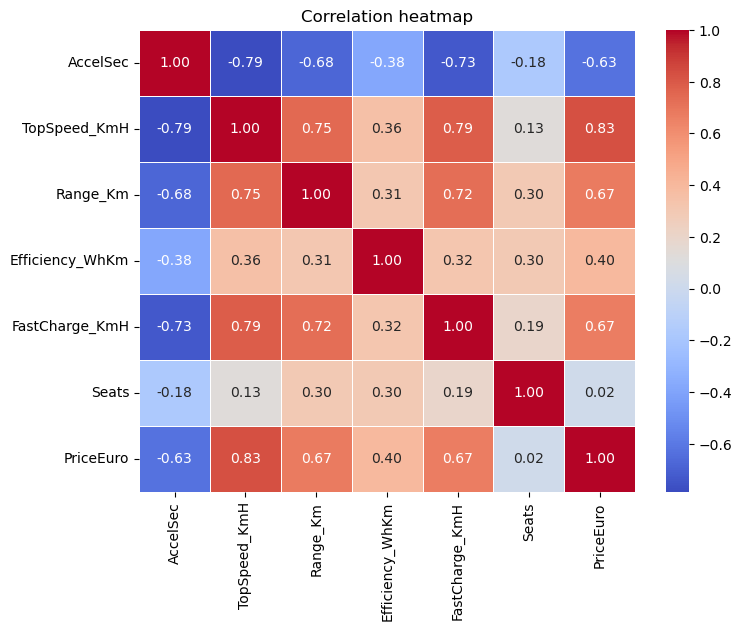

In [232]:
data_numeric=data.select_dtypes(include=['number'])
cor=data_numeric.corr()
plt.figure(figsize=(8, 6)) 
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation heatmap')
plt.show()


In [233]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['RapidCharge']=le.fit_transform(data['RapidCharge'])

In [234]:
data.drop(columns=['Segment'],axis=1,inplace=True)

In [235]:
data.drop(columns=['Brand'],axis=1,inplace=True)

In [236]:
data.drop(columns=['RapidCharge'],axis=1,inplace=True)

In [237]:
data.head()

,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,PowerTrain,PlugType,BodyStyle,Seats,PriceEuro
0,Model 3 Long Range Dual Motor,4.6,233,450,161,940,AWD,Type 2 CCS,Sedan,5,55480
1,ID.3 Pure,10.0,160,270,167,250,RWD,Type 2 CCS,Hatchback,5,30000
2,2,4.7,210,400,181,620,AWD,Type 2 CCS,Liftback,5,56440
3,iX3,6.8,180,360,206,560,RWD,Type 2 CCS,SUV,5,68040
4,e,9.5,145,170,168,190,RWD,Type 2 CCS,Hatchback,4,32997


In [239]:
data1=pd.get_dummies(data,columns=['Model','PowerTrain','PlugType','BodyStyle']).astype(int)


In [240]:
data1.head()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro,Model_2,Model_3 Crossback E-Tense,Model_500e Convertible,...,PlugType_Type 2 CHAdeMO,BodyStyle_Cabrio,BodyStyle_Hatchback,BodyStyle_Liftback,BodyStyle_MPV,BodyStyle_Pickup,BodyStyle_SPV,BodyStyle_SUV,BodyStyle_Sedan,BodyStyle_Station
0,4,233,450,161,940,5,55480,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,10,160,270,167,250,5,30000,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,4,210,400,181,620,5,56440,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,6,180,360,206,560,5,68040,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,9,145,170,168,190,4,32997,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [241]:
X = data1.drop(columns=['PriceEuro'],axis=1)
y = data1['PriceEuro']

In [242]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [284]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
X_train=st.fit_transform(X_train)
X_test=st.transform(X_test)

In [285]:
ann=tf.keras.models.Sequential()

In [286]:
ann.add(tf.keras.layers.Dense(units=128, activation='relu')) #input layer
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))#output layer

In [287]:
ann.compile(optimizer='adam',loss='mse',metrics=['mae'])


In [288]:
ann.fit(X_train,y_train,batch_size=10,epochs=1500)

Epoch 1/1500


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4174563328.0000 - mae: 56805.0703  
Epoch 2/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3451595776.0000 - mae: 52415.0625 
Epoch 3/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3636924416.0000 - mae: 53145.3867 
Epoch 4/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2957651968.0000 - mae: 49466.8867 
Epoch 5/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3842071552.0000 - mae: 55945.5469 
Epoch 6/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3474306304.0000 - mae: 52232.8594 
Epoch 7/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3980700160.0000 - mae: 55861.0938 
Epoch 8/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3712088576.0000 - mae: 53501.1523 
Epoch 9/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3725436160.0000 - mae: 54873.2539 
Epoch 10/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3362292224.0000 - mae: 51889.4609 
Epoch 11/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3333685248.0000 - mae:

In [289]:
# Reshaping y_test to a 2D array
y_test = nd.array(y_test)  # Convert y_test to NumPy array if it's a pandas Series
y_pred = ann.predict(X_test)

# Concatenate predictions and actual values
result = nd.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis=1)

print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[ 47662.015625    33000.        ]
 [ 31028.10742188  29234.        ]
 [ 91177.0078125   56440.        ]
 [137331.953125   215000.        ]
 [ 85674.1328125   45000.        ]
 [ 90392.328125    57500.        ]
 [130943.1015625  180781.        ]
 [ 35760.12109375  33246.        ]
 [ 52299.296875    37422.        ]
 [ 56035.2578125  149000.        ]
 [ 96202.6953125   85990.        ]
 [ 52316.921875    35575.        ]
 [ 54745.96875     45000.        ]
 [ 86963.1328125   65000.        ]
 [ 42367.98046875  29682.        ]
 [ 95883.5390625   67358.        ]
 [ 49499.6953125   35000.        ]
 [117593.6640625   61480.        ]
 [102402.5859375   75000.        ]
 [ 77854.640625    46380.        ]
 [ 30938.01757812  24534.        ]]


In [290]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE, MSE, and R^2
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 28494.83519345238
Mean Squared Error: 1363120407.103779
R-squared: 0.46426496542519646
